### Import Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load Dataset

In [8]:
df = pd.read_csv('insurance.csv')

### EDA

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### One Hot Encoding

In [16]:
df = pd.get_dummies(df, columns=['sex'], prefix='Sex', dtype='uint8')
df = pd.get_dummies(df, columns=['smoker'], prefix='Smokes', dtype='uint8')

In [18]:
df.head()

,age,bmi,children,region,charges,Sex_female,Sex_male,Smokes_no,Smokes_yes
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0


In [20]:
df = df.drop(columns = ['Sex_male', 'Smokes_no'])

In [22]:
df.head()

,age,bmi,children,region,charges,Sex_female,Smokes_yes
0,19,27.900,0,southwest,16884.92400,1,1
1,18,33.770,1,southeast,1725.55230,0,0
2,28,33.000,3,southeast,4449.46200,0,0
3,33,22.705,0,northwest,21984.47061,0,0
4,32,28.880,0,northwest,3866.85520,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   bmi         1338 non-null   float64
 2   children    1338 non-null   int64  
 3   region      1338 non-null   object 
 4   charges     1338 non-null   float64
 5   Sex_female  1338 non-null   uint8  
 6   Smokes_yes  1338 non-null   uint8  
dtypes: float64(2), int64(2), object(1), uint8(2)
memory usage: 55.0+ KB


#### Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [35]:
le.fit(df['region'])
df['region'] = le.transform(df['region'])

In [39]:
df.head()

,age,bmi,children,region,charges,Sex_female,Smokes_yes
0,19,27.900,0,3,16884.92400,1,1
1,18,33.770,1,2,1725.55230,0,0
2,28,33.000,3,2,4449.46200,0,0
3,33,22.705,0,1,21984.47061,0,0
4,32,28.880,0,1,3866.85520,0,0


In [41]:
X = df.drop(columns = ['charges'])
y = df['charges']

### Data Visualisation

#### Plot Histogram

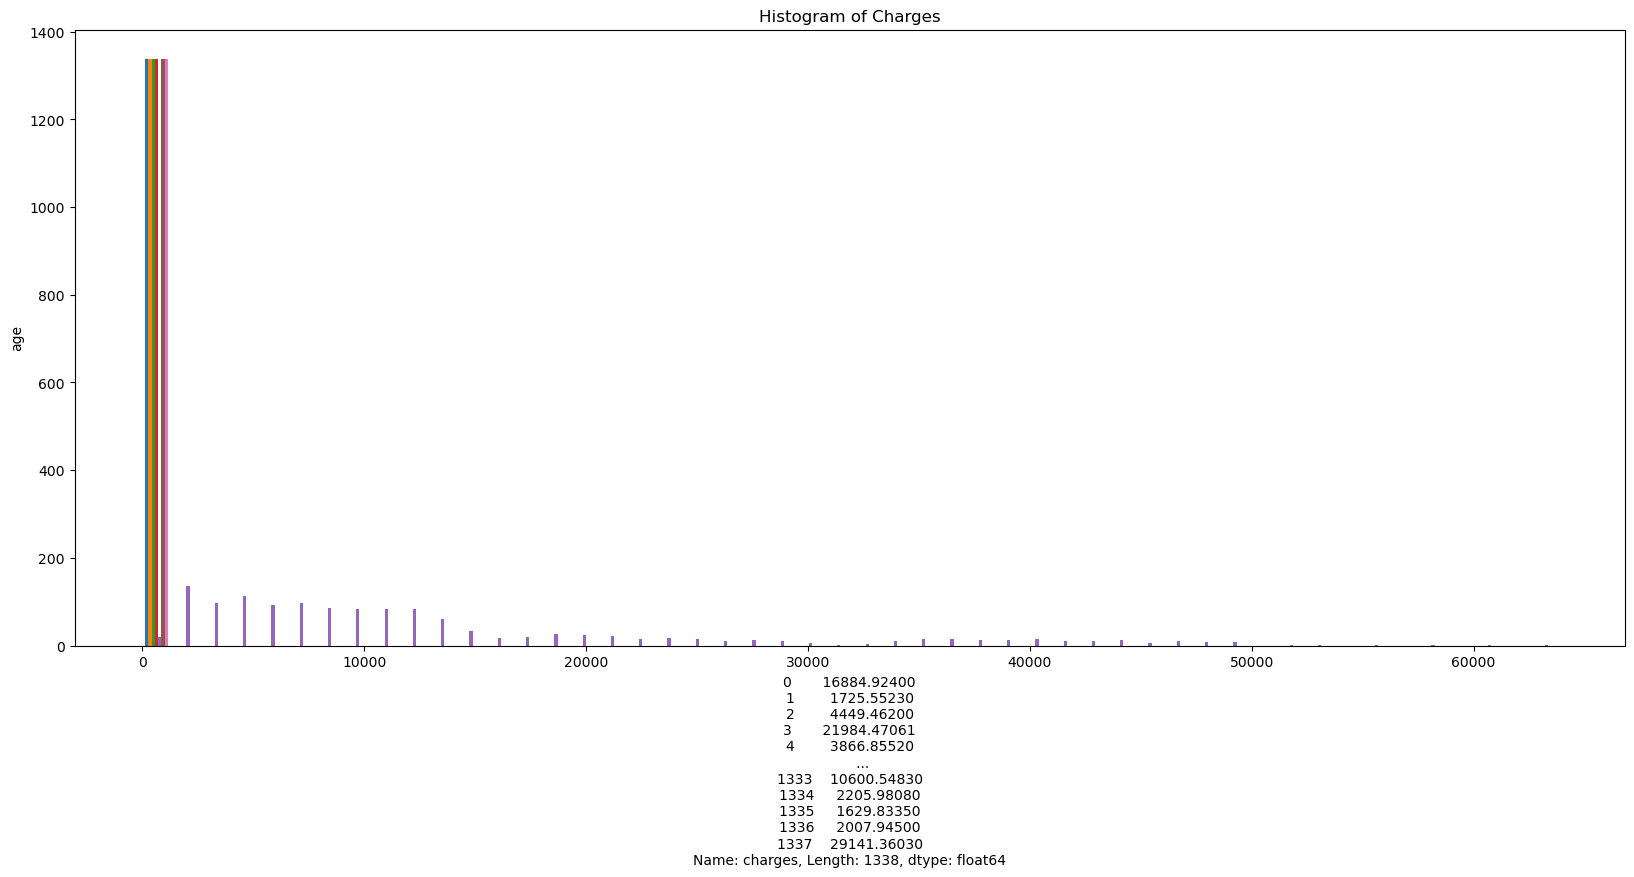

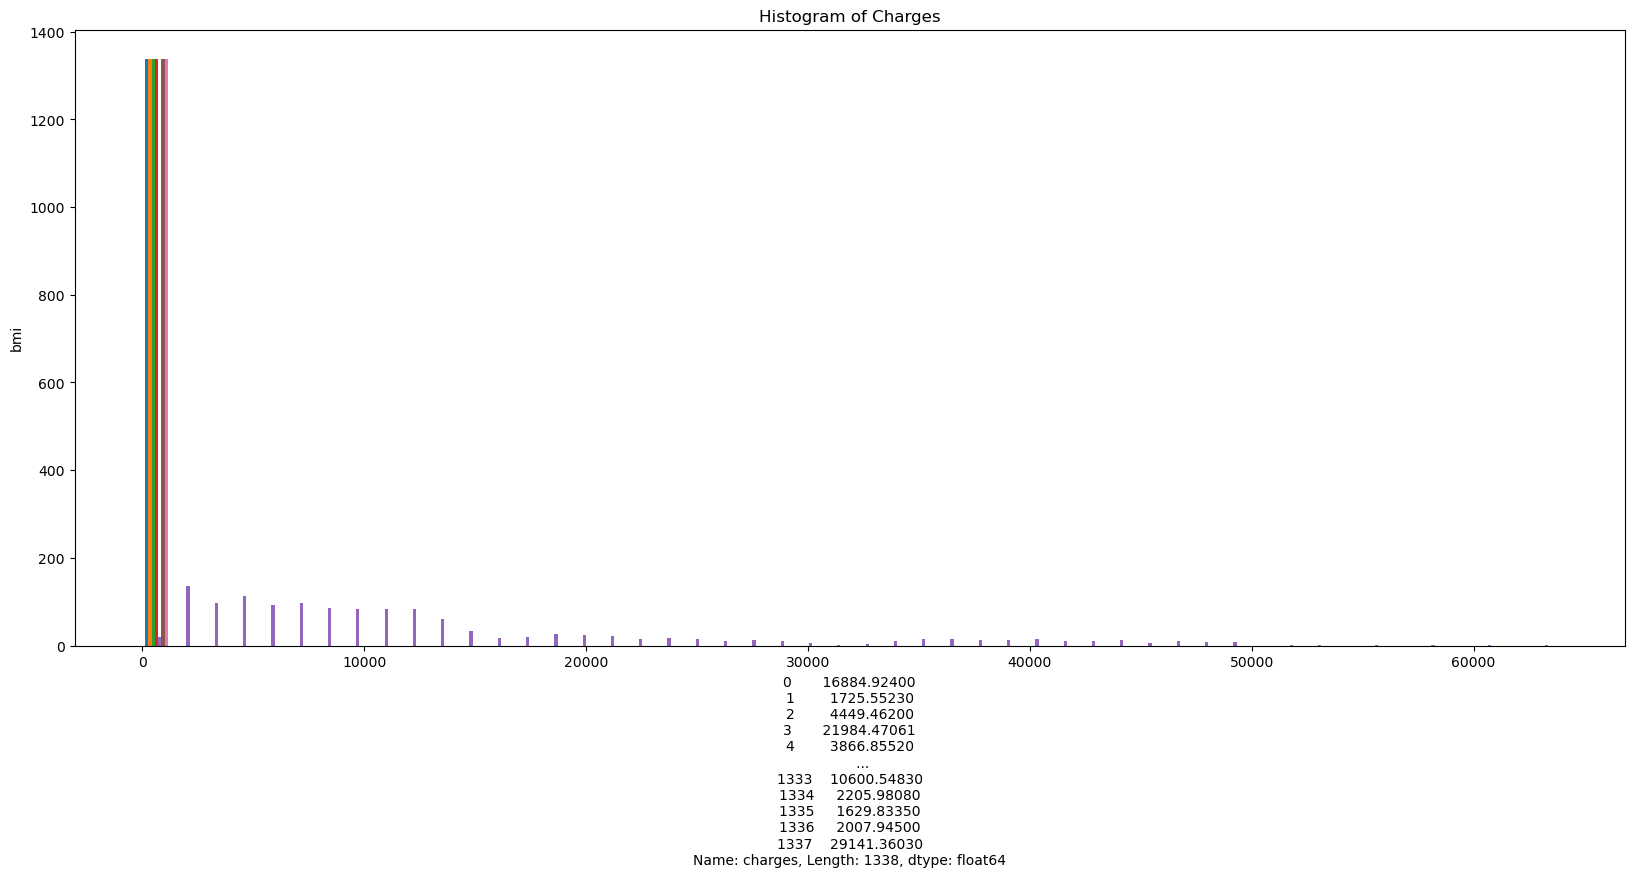

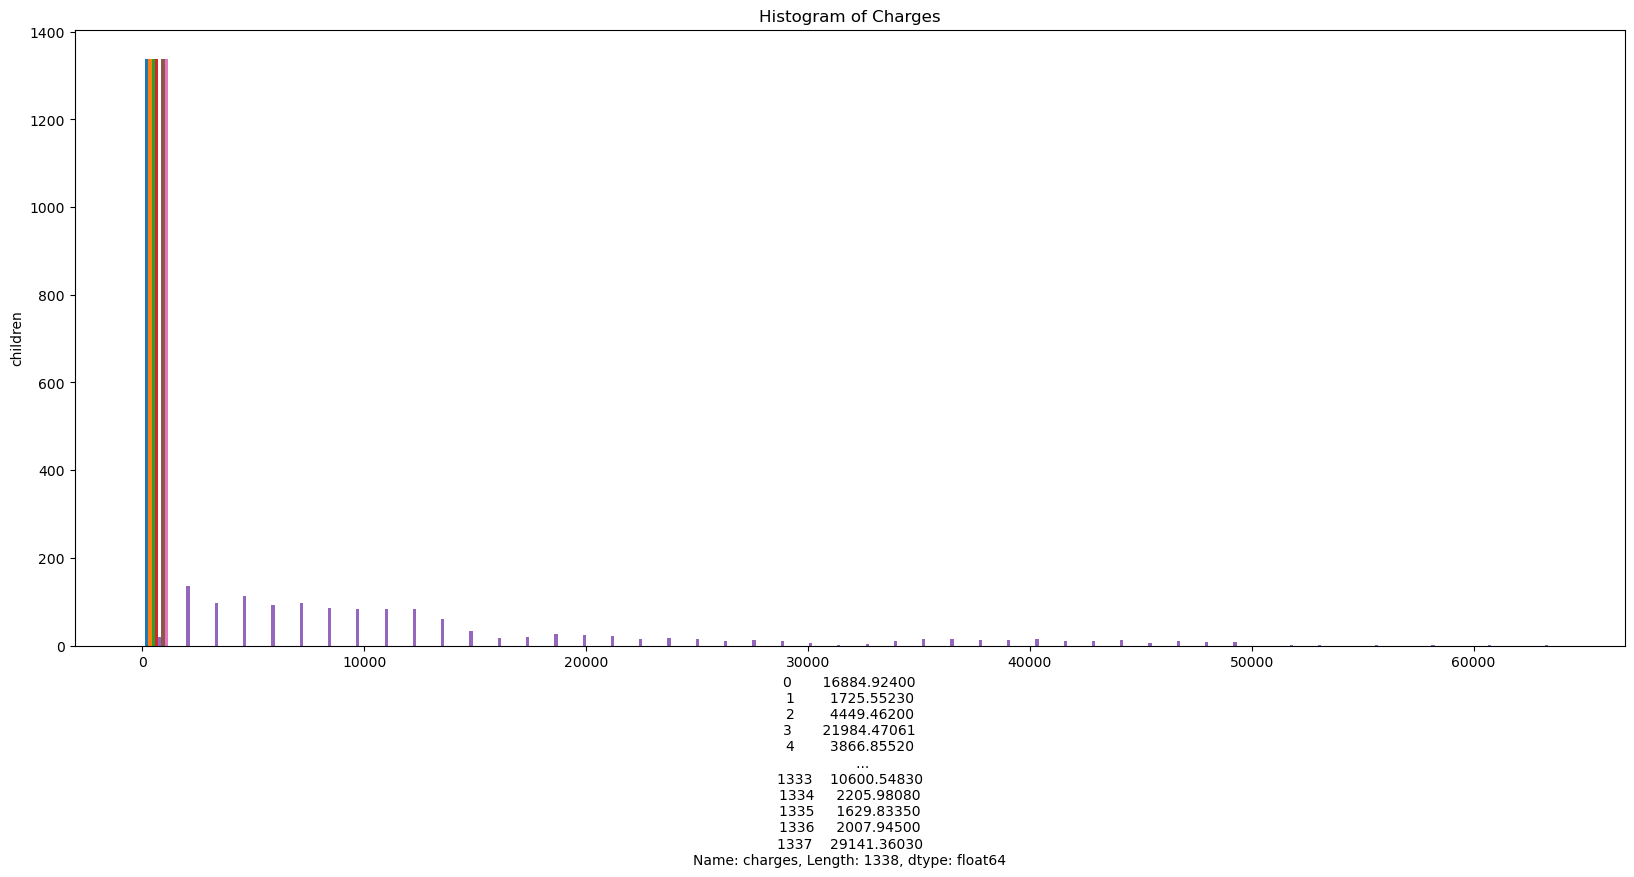

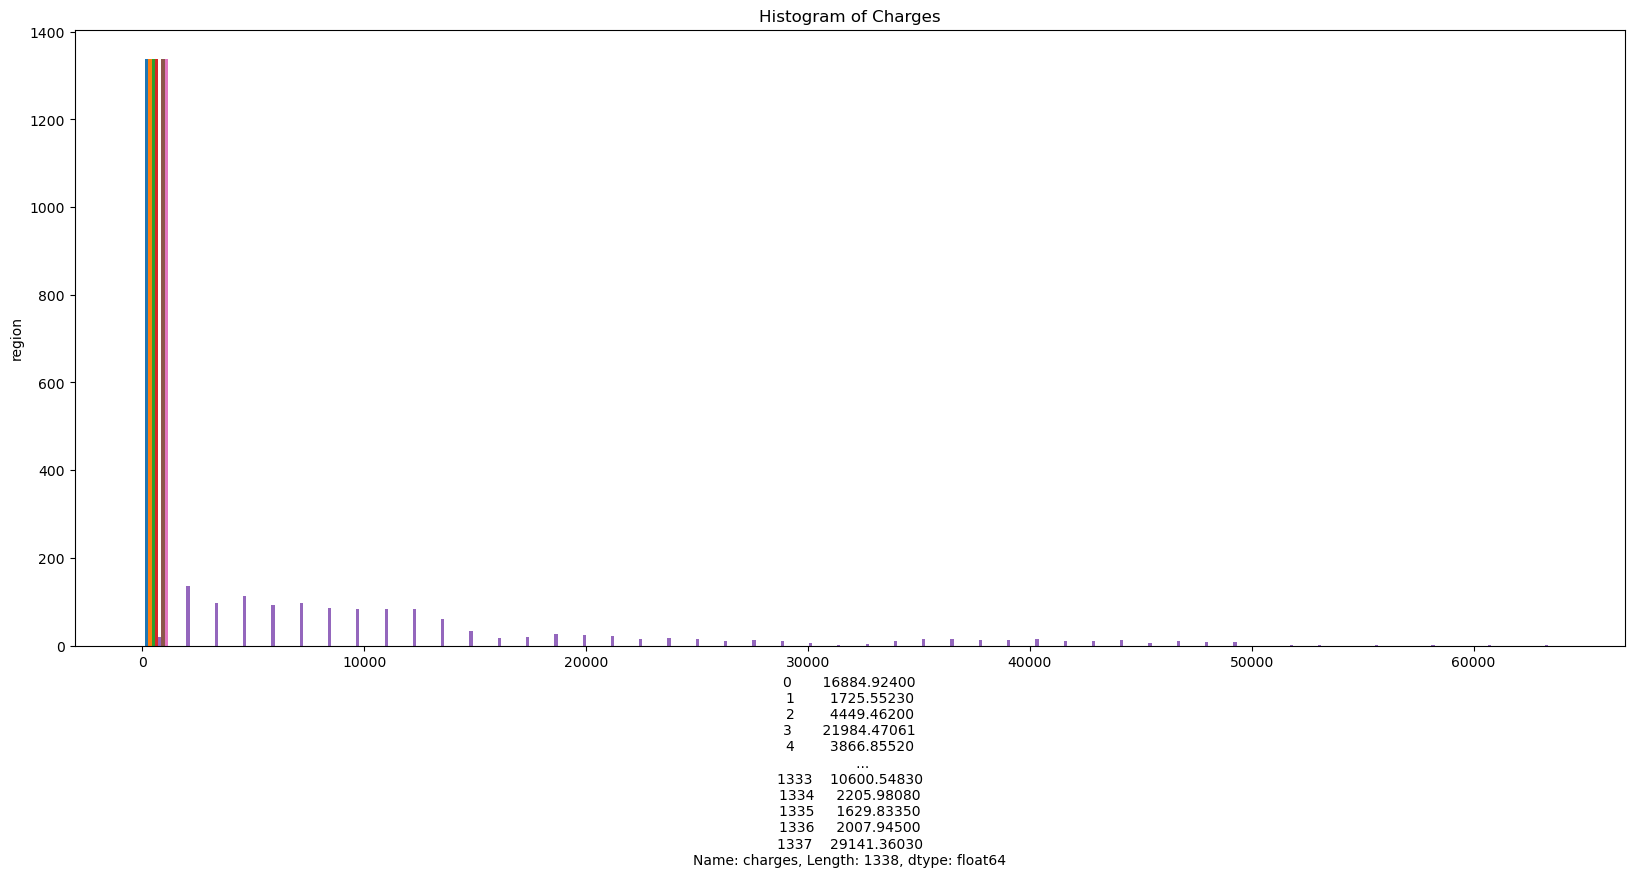

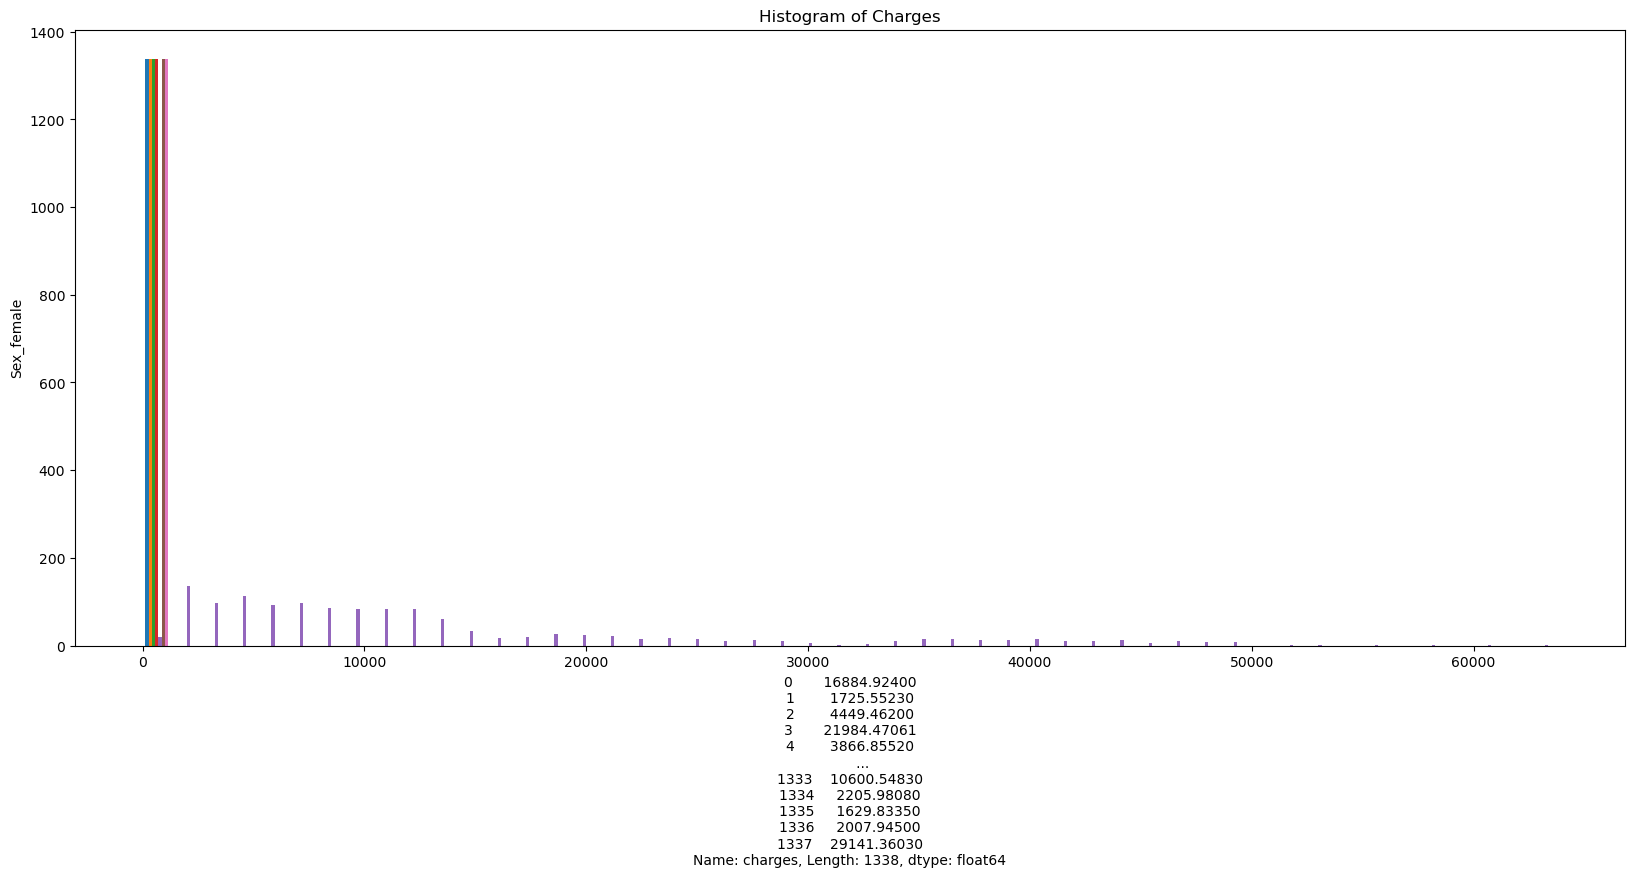

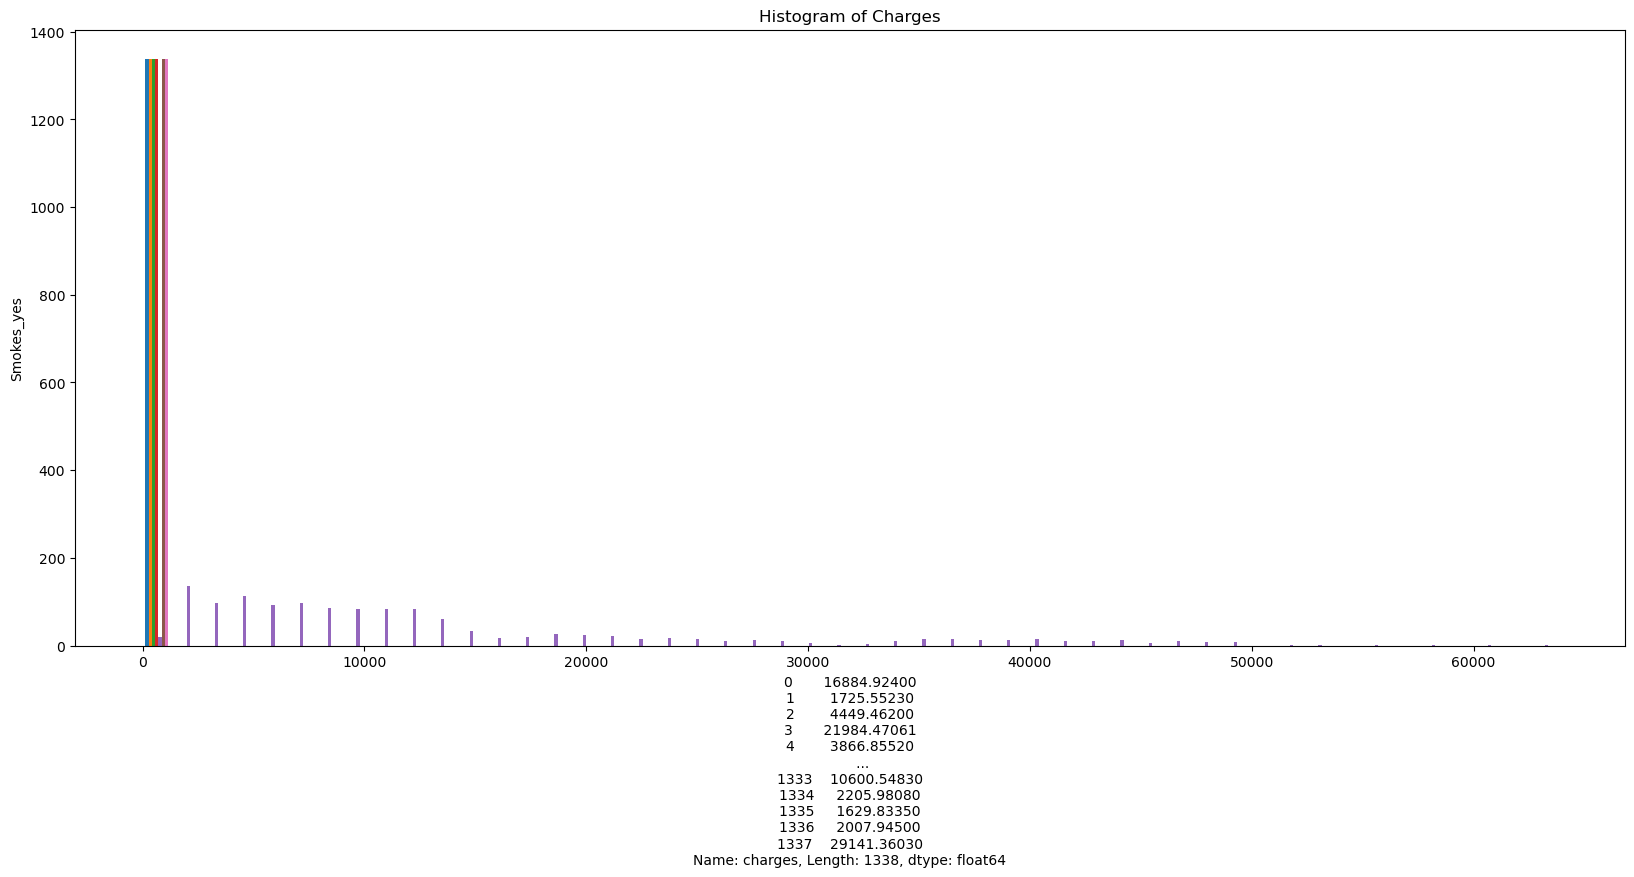

In [57]:
for feature in X:
    plt.figure(figsize=(20, 8))
    plt.hist(df, bins = 50)
    plt.xlabel(y)
    plt.ylabel(feature)
    plt.title("Histogram of Charges")
    plt.show()